# **Density-based spatial clustering (DBSCAN)**

DBSCAN documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [6]:
import numpy as np
# import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

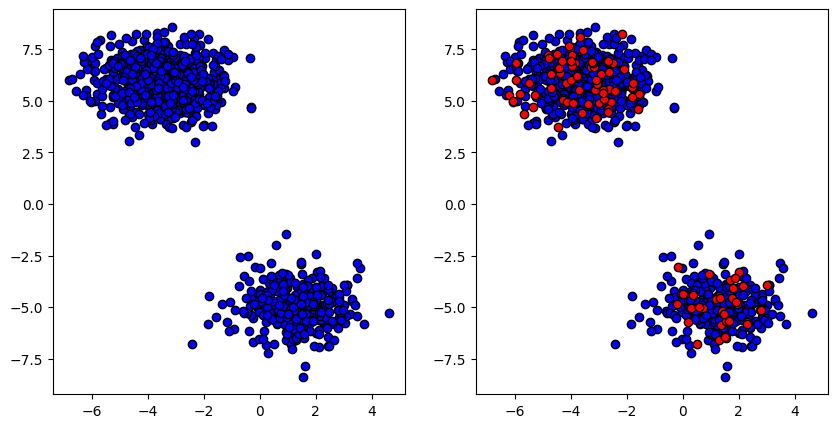

In [7]:
X, _ = make_blobs(n_samples = 1000, n_features = 2, random_state=69) 

# Train test splits
X_train, X_test = train_test_split(X,test_size= 0.1, random_state= 1)
_, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].scatter(X[:,0], X[:,1], c='b', edgecolor='k')
axes[1].scatter(X_train[:,0], X_train[:,1], c='b', edgecolor='k')
axes[1].scatter(X_test[:,0], X_test[:,1], c='r', edgecolor='k')

plt.show() 

In [47]:
dbscan = DBSCAN(eps= 1 , min_samples= 3 )

# Train DBSCAN
dbscan.fit (X_train)


DBSCAN(eps=1, min_samples=3)

In [48]:
# Predictions
predictions = dbscan.fit_predict(X_test)
print(np.unique(predictions, return_counts= True))

(array([-1,  0,  1]), array([ 3, 65, 32]))


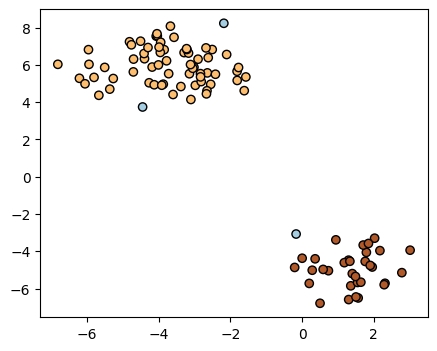

In [49]:
_, ax = plt.subplots(figsize = (5,4))
plt.scatter(X_test[:,0], X_test[:,1], c=predictions, edgecolors='k', cmap='Paired')

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c=predictions, edgecolors='k', cmap='Paired')

# **DBSCAN on real data**

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [ ]:
_ 


plt.scatter( _ , _ )
print (X.shape, y.shape)

In [ ]:
dbscan = DBSCAN(eps= _ , min_samples= _ )
dbscan.fit( _ )

In [ ]:
predictions = _ 

In [ ]:
# Plot 
_

# **DBSCAN on images**

Use any of the following images:
 - [image1.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [image2.png](https://drive.google.com/file/d/1RxivIbgi2eAG6p1myuxQGJs2zhGEsH_4/view?usp=sharing)
 - [image3.jpg](https://drive.google.com/file/d/1Pc_C9B_vqIxkLFV90RWSlRxRcTN-yKqF/view?usp=sharing)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.cluster import DBSCAN


(436, 772, 3)
(100, 150, 3)


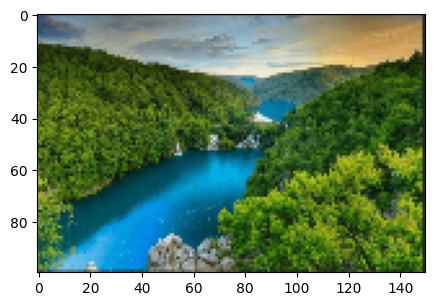

In [55]:
original_image = cv2.imread('../images/image2.png')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
print(original_image.shape)
original_image = cv2.resize(original_image, (150, 100))
print(original_image.shape)

img_hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
_, ax = plt.subplots(figsize=(5, 4))
ax.imshow(original_image)


In [56]:
vectorized_hsv = img_hsv[:,:,0].reshape(-1, 1)
print(vectorized_hsv.shape)

(15000, 1)


In [73]:
eps = max(abs(img_hsv[:,:,0].max() - img_hsv[:,:,0].min()), abs(img_hsv[:,:,1].max() - img_hsv[:,:,1].min()))*0.01
print(eps)

min_samples = int(len(vectorized_hsv)*0.01)
print(min_samples)

2.47
150


In [74]:
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
predictions = dbscan.fit_predict(vectorized_hsv)
print(predictions.shape)

(15000,)


In [75]:
print(np.unique(predictions))

[-1  0  1]


Text(0.5, 1.0, 'Segmented Image')

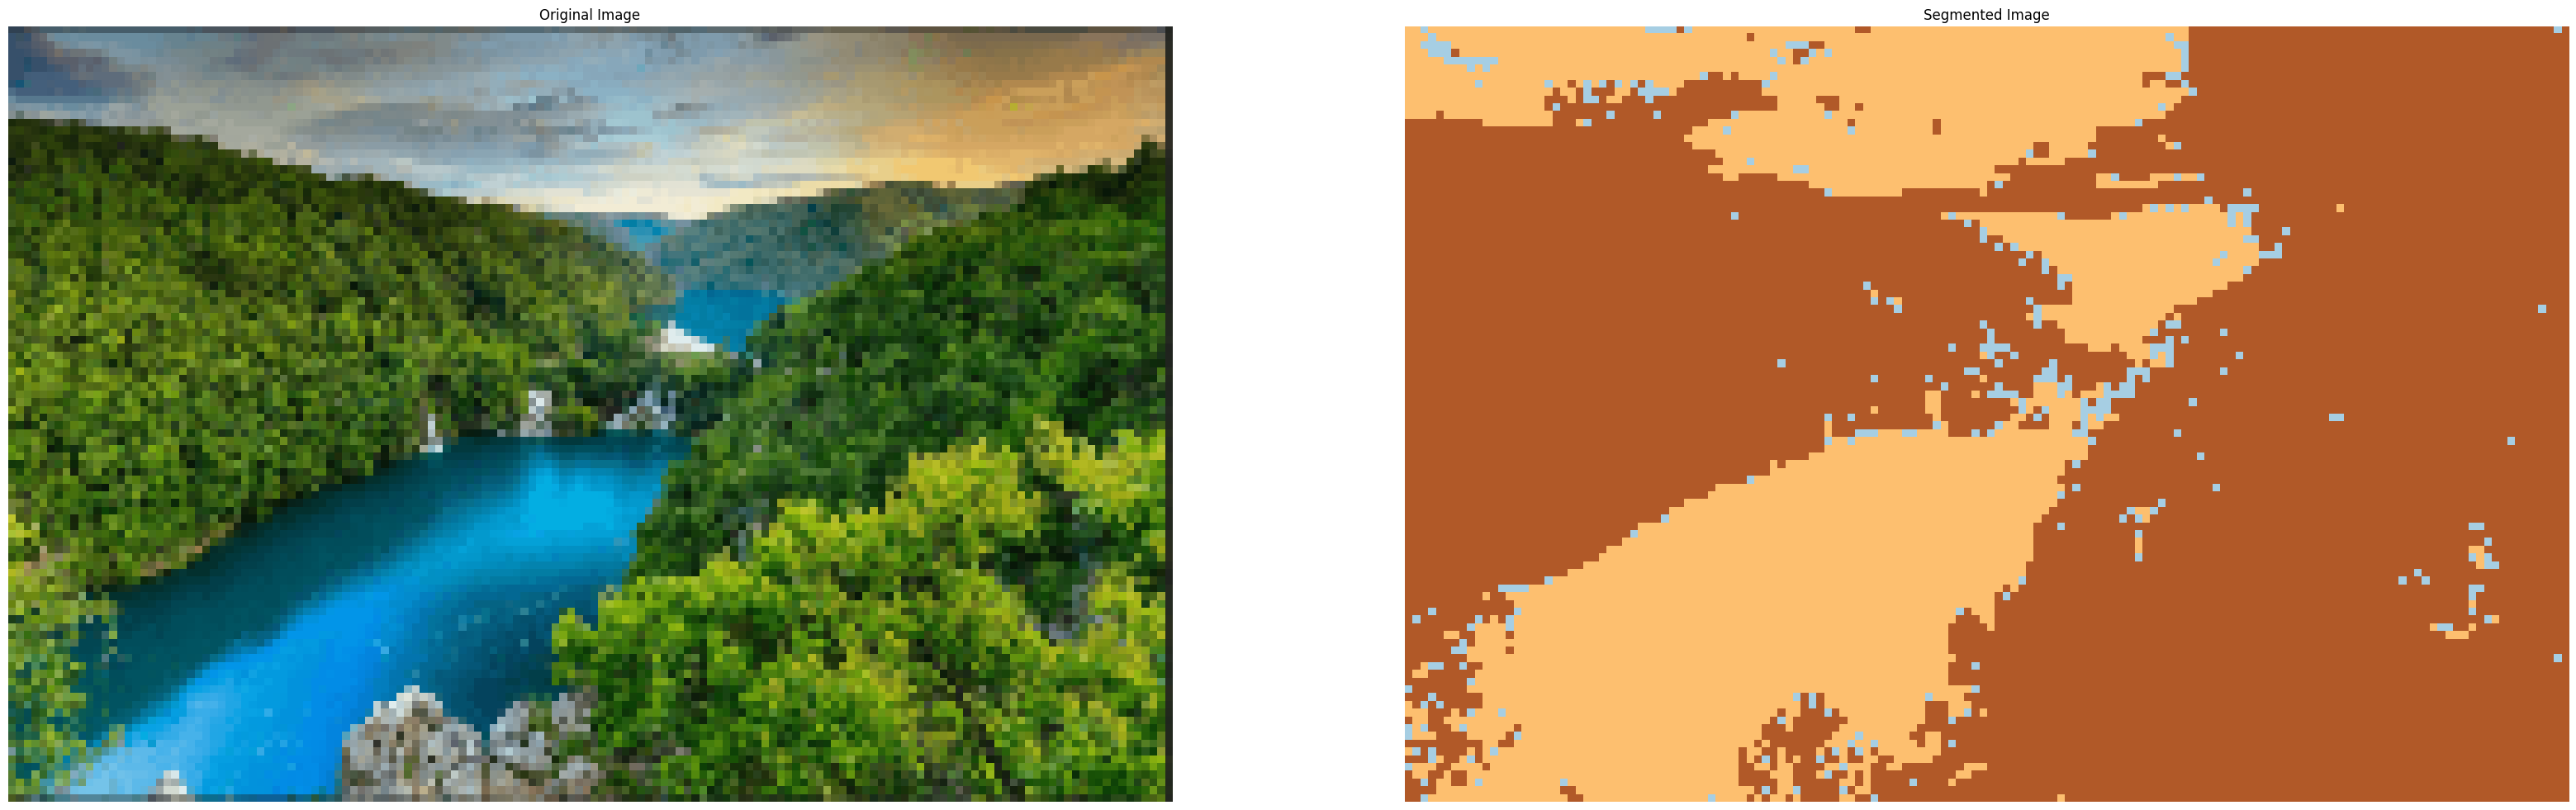

In [81]:
predictions = predictions.reshape(original_image.shape[:2])
_, axes = plt.subplots(1, 2, figsize=(40, 20))
axes[0].imshow(original_image)
axes[0].set_axis_off()
axes[0].set_title('Original Image')
axes[1].imshow(predictions, cmap='Paired')
axes[1].set_axis_off()
axes[1].set_title('Segmented Image')

In [ ]:
cluster_mask = np.array(predictions == 1, dtype=np.uint8)

masked_image = np.copy(original_image)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask=cluster_mask)
fig_titles = ['Original Image', 'Cluster Image', 'Segment Image']


_, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(original_image)
axes[1].imshow(predictions, cmap='gray')
axes[2].imshow(masked_image)

for  ax,title in zip (axes, fig_titles):
    ax[0].set_axis_off(),ax.set(title)
    
    plt.tight_layout()
